In [1]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('welldata_apr2.csv', parse_dates=['drilldate'])

# change drilldate to datetime format
df.index = pd.to_datetime(df['drilldate'])

# delete all rows with drill depth of 0
df = df[df['depth'] !=0]
df.dropna(subset=['drilldate'], inplace=True)

# create new column based on drilldate, made up of only the year.
df['year']=df['drilldate'].dt.year

# new dataframe of only observations since 1980
df1980 = df[(df['year'] >= 1980)]

print(len(df1980))
print(df1980.head(5))


327
            Registry No. (55-)  GWSI Site ID     Cadastral     Owner Name  \
drilldate                                                                   
1980-01-01               85773           NaN  D17027031ADD     RICHARDS,L   
1980-02-22              630770           NaN  D18027014BCC  JAGIELSKI,R L   
1980-04-16              631168           NaN  D17026009BCC   CONSTANT,C D   
1980-04-28              641273           NaN  D18026012DAA    HAWKINS,H L   
1980-07-13               84997           NaN  D18026034BBC   JOEY SALZMAN   

             Well Type  depth  Casing Depth (ft)  Case Dia (in)  drilldate  \
drilldate                                                                    
1980-01-01      EXEMPT  400.0              400.0            6.0 1980-01-01   
1980-02-22      EXEMPT  403.0              403.0            8.0 1980-02-22   
1980-04-16      EXEMPT  480.0              440.0            6.0 1980-04-16   
1980-04-28      EXEMPT  320.0              320.0            9.0 19

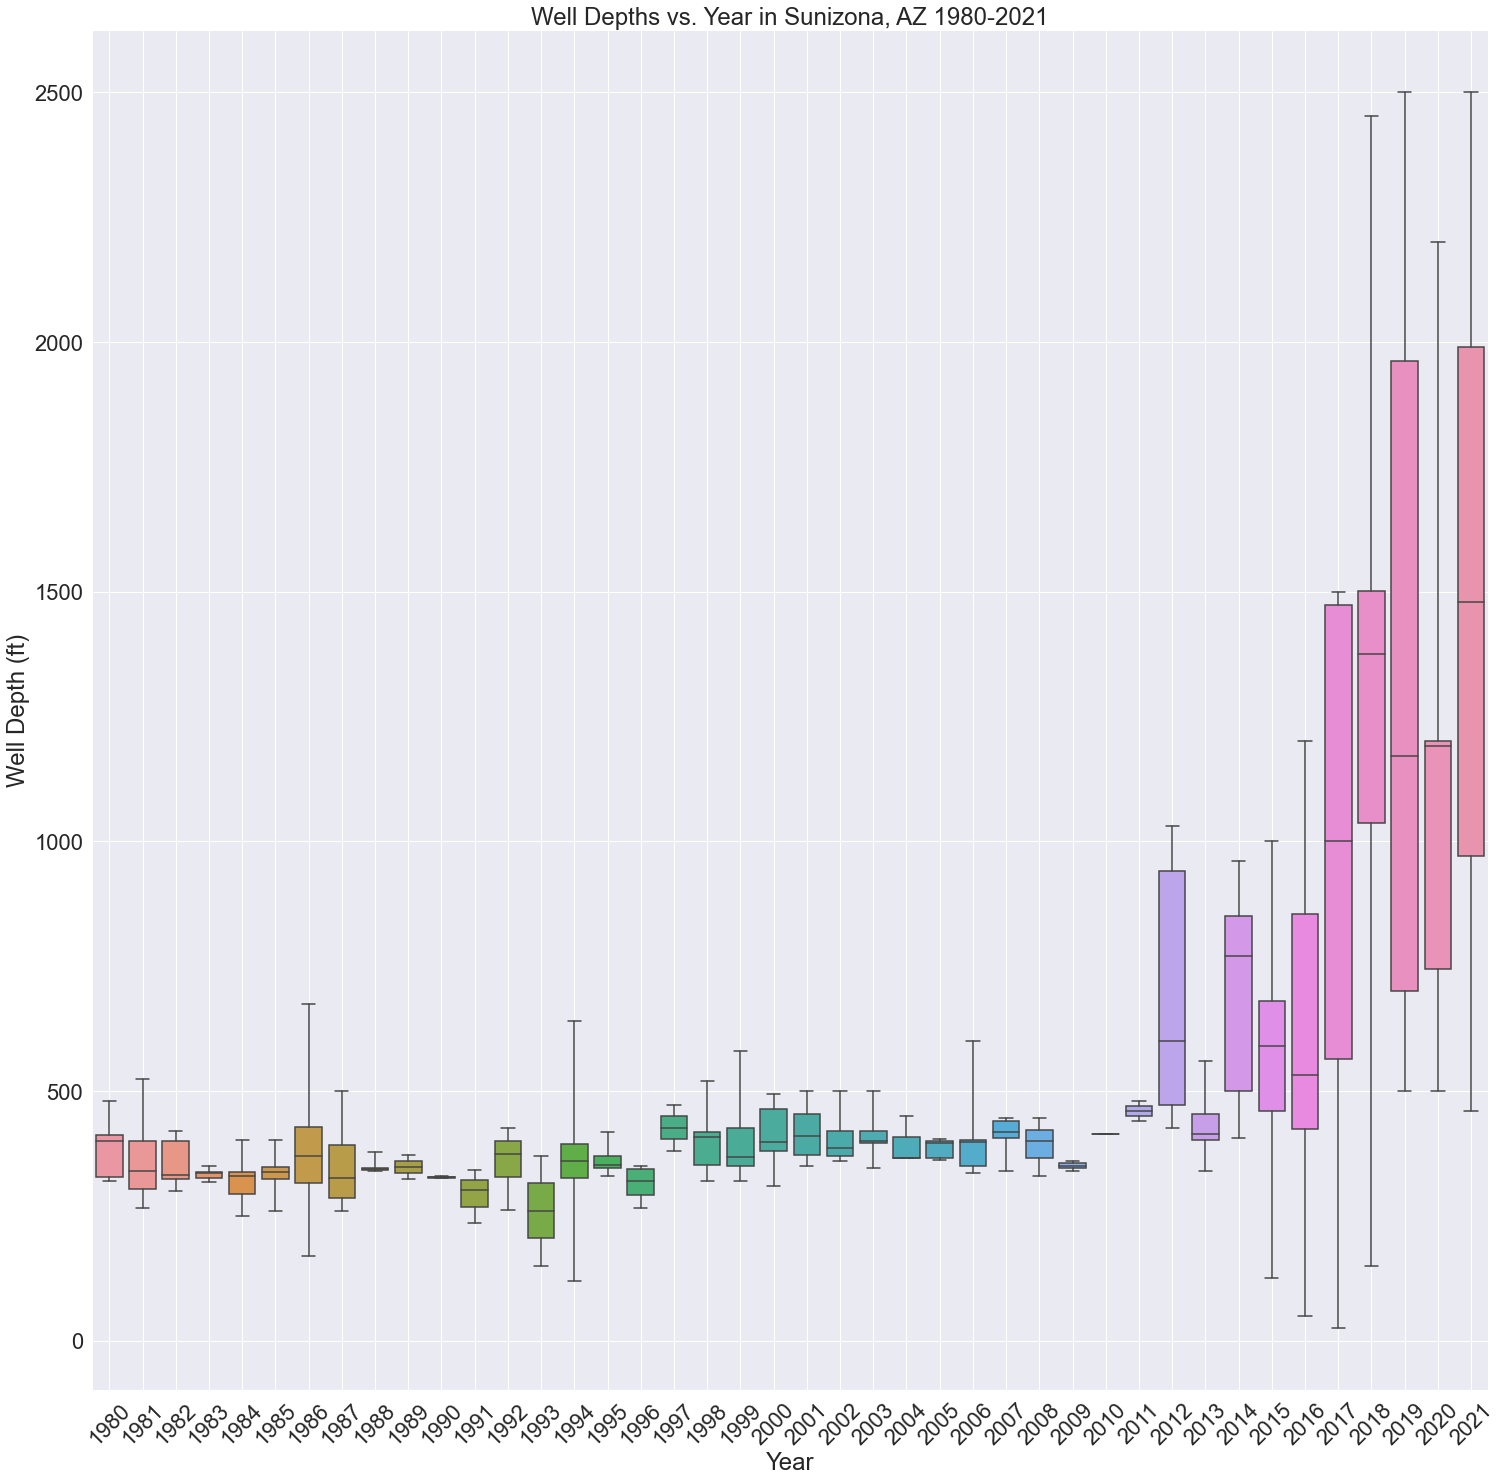

In [5]:
df.dtypes

fig, ax = plt.subplots(figsize=(25,25))

sns.boxplot(x=df1980['year'], y=df1980['depth'], data=df, whis=[0,100])
ax.set_title("Well Depths vs. Year in Sunizona, AZ 1980-2021")
ax.set_ylabel("Well Depth (ft)")
ax.set_xlabel("Year")
sns.set(font_scale=1)
ax.xaxis.grid(True)
plt.xticks(rotation=45)
sns.despine(trim=True, left=True)

plt.show()